## Expt.-6: Classification of Credit Card Default Risk using Support Vector Machine
## Name:Jhoshua Coutinho 
## Class: SE AIML  Roll No.11

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [4]:
# Load dataset
data = pd.read_csv("credit.csv", skiprows=1)
data = data.sample(5000, random_state=42)

print(data.columns)
data.drop(columns=['ID'], inplace=True)
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [5]:
data.describe()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000
mean,167192.000000,1.596600,1.855200,1.550000,35.395000,-0.011000,-0.137600,-0.157200,-0.221000,-0.269400,...,44272.255000,41011.468000,39336.039200,5556.689400,5596.743000,5050.37060,4722.326600,4751.23760,5465.348600,0.222600
std,128399.113714,0.490629,0.778431,0.517642,9.130063,1.109381,1.198897,1.219338,1.172874,1.135025,...,64971.997836,61007.743435,60370.522115,13511.851832,16419.265474,14022.48402,13167.023137,14183.13024,19247.399693,0.416033
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2298.750000,1740.000000,1126.500000,978.750000,711.250000,396.00000,310.000000,257.75000,126.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19327.500000,18296.000000,16882.500000,2200.000000,2008.000000,1860.00000,1600.000000,1501.50000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56629.000000,50999.500000,49784.750000,5018.250000,5000.000000,4584.75000,4200.000000,4080.00000,4185.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,706864.000000,489200.000000,527566.000000,272817.000000,384986.000000,344261.00000,330982.000000,303512.00000,528666.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2308 to 4110
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   5000 non-null   int64
 1   GENDER                      5000 non-null   int64
 2   EDUCATION                   5000 non-null   int64
 3   MARRIAGE                    5000 non-null   int64
 4   AGE                         5000 non-null   int64
 5   PAY_0                       5000 non-null   int64
 6   PAY_2                       5000 non-null   int64
 7   PAY_3                       5000 non-null   int64
 8   PAY_4                       5000 non-null   int64
 9   PAY_5                       5000 non-null   int64
 10  PAY_6                       5000 non-null   int64
 11  BILL_AMT1                   5000 non-null   int64
 12  BILL_AMT2                   5000 non-null   int64
 13  BILL_AMT3                   5000 non-null   int64
 14  BILL_AMT4 

In [7]:
data.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2308,30000,1,2,2,25,0,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
22404,150000,2,1,2,26,0,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
23397,70000,2,3,1,32,0,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
25058,130000,1,3,2,49,0,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
2664,50000,2,2,2,36,0,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1


In [8]:
data.tail()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6778,180000,1,1,2,27,0,0,0,0,0,...,16908,37319,34978,19000,5000,10009,22000,20000,15000,0
25284,50000,2,2,2,22,0,0,0,0,0,...,52198,43181,31473,2000,2000,10052,2000,1136,2000,0
18355,200000,2,1,2,24,-2,-2,-2,-2,-2,...,500,2057,23322,1053,0,500,2057,23322,4299,0
27684,120000,2,2,2,24,0,0,0,0,0,...,53216,49194,48487,2000,2600,4241,1700,2500,1500,0
4110,90000,2,2,1,29,0,0,0,0,0,...,4173,4408,5846,1522,3010,1500,1500,1500,2000,0


In [9]:
data.isnull().sum()

LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
# Target column: default payment (0 = no, 1 = yes)
y = data['default payment next month']

# Select only two features for visualization
X = data[['BILL_AMT1', 'BILL_AMT2']]

print(X.dtypes)
print(X.head())

BILL_AMT1    int64
BILL_AMT2    int64
dtype: object
       BILL_AMT1  BILL_AMT2
2308        8864      10062
22404     136736     125651
23397      70122      69080
25058      20678      18956
2664       94228      47635


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    "Linear SVM": SVC(kernel='linear',C=1, class_weight='balanced'),
    "Polynomial SVM": SVC(kernel='poly',
                          degree=2,
                          C=1,
                          gamma='scale',
                          class_weight='balanced'),
    "RBF SVM": SVC(kernel='rbf',
                   C=5,
                   gamma = 0.1,
                   class_weight='balanced')
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n", name)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Precision:\n {precision_score(y_test, y_pred)}")
    print(f"Recall:\n {recall_score(y_test, y_pred)}")
    print(f"F1 score:\n {f1_score(y_test, y_pred)}")
    print(f"Accuracy:\n {accuracy_score(y_test, y_pred)}")


 Linear SVM
Confusion Matrix:
 [[ 103 1056]
 [  34  307]]
Precision:
 0.2252384446074835
Recall:
 0.9002932551319648
F1 score:
 0.36032863849765256
Accuracy:
 0.2733333333333333

 Polynomial SVM
Confusion Matrix:
 [[  35 1124]
 [   8  333]]
Precision:
 0.22855181880576528
Recall:
 0.9765395894428153
F1 score:
 0.3704115684093437
Accuracy:
 0.24533333333333332

 RBF SVM
Confusion Matrix:
 [[560 599]
 [166 175]]
Precision:
 0.22609819121447028
Recall:
 0.5131964809384164
F1 score:
 0.31390134529147984
Accuracy:
 0.49


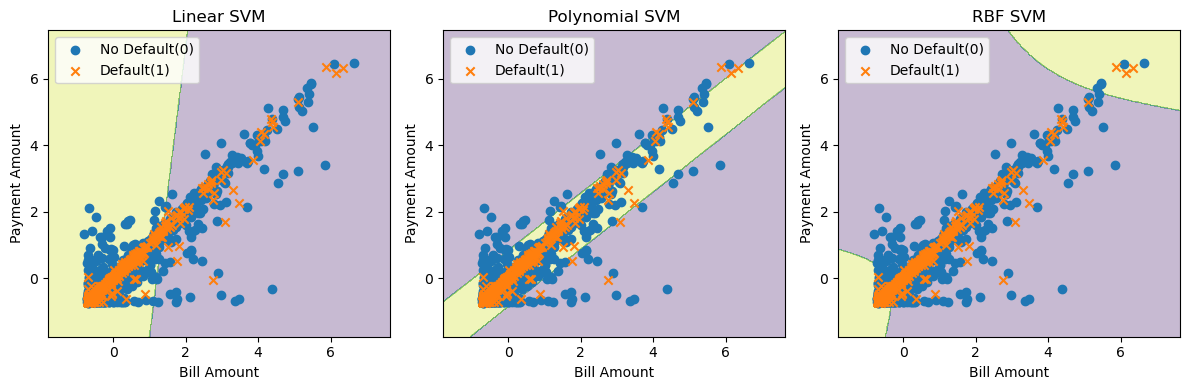

In [24]:
# Decision Boundary Visualization
def plot_decision_boundary(model, title):
    h = 0.02
    x_min, x_max = X_train[:,0].min() -1, X_train[:,0].max()+1
    y_min, y_max = X_train[:,1].min() -1, X_train[:,1].max()+1
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min,y_max,h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.3)
    plt.scatter(X_train[y_train==0,0],
               X_train[y_train==0,1],
               label = 'No Default(0)',
               marker='o')
    plt.scatter(X_train[y_train==1,0],
               X_train[y_train==1,1],
               label = 'Default(1)',
               marker='x')
    plt.legend()
    plt.title(title)
    plt.xlabel('Bill Amount')
    plt.ylabel('Payment Amount')



plt.figure(figsize=(12,4)) 

for i , (name, model) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, name)
plt.tight_layout()    
plt.show()
